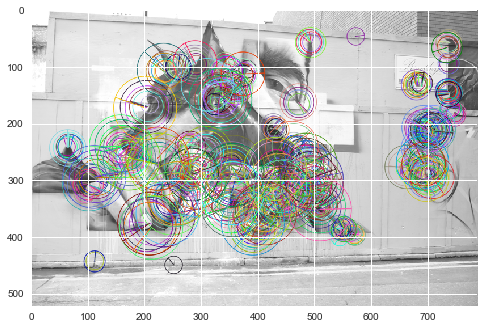

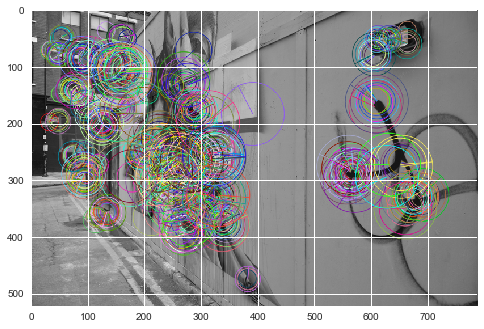

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import seaborn as sns
from time import time
from PIL import Image

img1 = cv2.cvtColor(cv2.imread('img/v_dogman/1.ppm'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('img/v_dogman/6.ppm'), cv2.COLOR_BGR2RGB)
H_gt = np.loadtxt('img/v_dogman/H_1_6')
#Images are taken from HSequences dataset https://github.com/hpatches/hpatches-dataset

det = cv2.ORB_create(500)
kps1, descs1 = det.detectAndCompute(img1,None)
kps2, descs2 = det.detectAndCompute(img2,None)

vis_img1, vis_img2 = None,None
vis_img1 = cv2.drawKeypoints(cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY),kps1,vis_img1, 
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
vis_img2 = cv2.drawKeypoints(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),kps2,vis_img2, 
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(vis_img1)
plt.figure()
plt.imshow(vis_img2)

In [6]:
from extract_patches import extract_patches, extract_patches_pil, patch_extract_vbalnt
# extract_patches performs extraction from the appropriate level of image pyramid, 
# removing high freq artifacts. 
# Border mode is set to "replicate", so the patch don`t have crazy black borders


('vbalnt baseline for 500 kps', 0.05674004554748535)
('pyr OpenCV version for 500 kps', 0.021442890167236328)
('pyr PIL version for 500 kps', 0.05463099479675293)


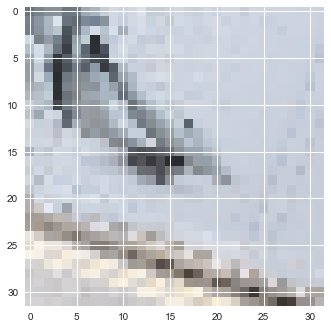

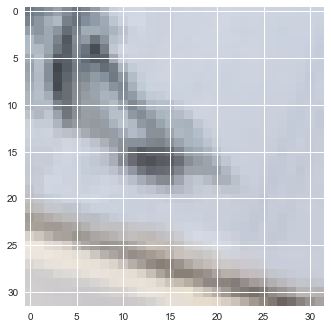

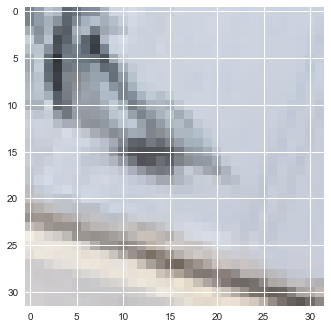

In [7]:
show_idx = 20
t=time()
patches_vbalnt = patch_extract_vbalnt(kps1, img1, 32, 5.0)
print ('vbalnt baseline for 500 kps', time()-t)
plt.imshow(patches_vbalnt[show_idx])
plt.figure()
t=time()
patches = extract_patches(kps1, img1, 32, 5.0)
print ('pyr OpenCV version for 500 kps', time()-t)
plt.imshow(patches[show_idx])
plt.figure()
t=time()
patches_pil = extract_patches_pil(kps1, img1, 32, 5.0)
print ('pyr PIL version for 500 kps', time()-t)
plt.imshow(patches_pil[show_idx])